<a href="https://colab.research.google.com/github/biancafsena/NATURAL-LANGUAGE-PROCESSING/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exercício - Aula 2**

## Dado o dataset de produtos [1], você deverá desenvolver diferentes modelos para classificação de textos, envolvendo cenários diferentes. O dataset utilizado será o de classificação de produtos, utilizado na aula anterior.

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

Obs.: em todos os modelos use:
- Remoção dos registros com valores faltantes
- criem uma nova coluna concatenando as colunas nome e descrição.
- randon_state igual a 42 para permitir a comparação com seus colegas e separe uma amostra de 30% para teste.
- Nas partes 1 e 2, utilize sempre o mesmo algorítmo de classificação.
- Para avaliação de resultados, sempre apresente o relatório de classificação e a matriz de confusão


### Parte 1 - Diferentes tipos de vetorização com um mínimo de normalização

Nesta parte você deverá aplicar apenas as seguintes técnicas de normalização:

1. Tokenização
2. Remoção de pontuação
3. Lowercasing

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões

### Parte 2 - Diferentes tipos de vetorização com um processo completo de normalização

Nesta parte você deverá aplicar todas as técnicas de normalização vistas em sala:

1. Tokenização
2. Remoção de pontuação
3. Lowercasing
4. Remoção de stop-words
5. Lematização/Stemmização

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões. Em suas análises, consifere também os resultados obtidos na parte 1

### Parte 3 (Extra) - Diferentes algorítmos de classificação

Nesta parte você deverá selecionar um dos datasets criados na parte 2 (justifique) e treinar 3 modelos de classificação utilizando diferentes algorítmos. Seguem algumas sugestões de algorítimos:

- Regressão Logistica (LogisticRegression)
- Random Forest (RandomForestClassifier)
- Naive Bayes (MultinomialNB e BernoulliNB)


Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões.




## **Parte 1 - Diferentes tipos de vetorização com um mínimo de normalização**

### **Bibliotecas**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Com objetivo de importar varias bibliotecas com modulos de dados.

### **Carregador de Dados**

In [ ]:
url = 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv'
data = pd.read_csv(url, delimiter=';')
print(data)


                                                   nome  \
0                               O Hobbit - 7ª Ed. 2013    
1                    Livro - It A Coisa - Stephen King    
2      Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...   
3                                     Box Harry Potter    
4                             Livro Origem - Dan Brown    
...                                                 ...   
4075   Zelda: Breath Of The Wild - Expansion Pass - ...   
4076   Middle Earth Shadow Of Mordor Legion Edition ...   
4077   Fifa 17 Ps3 Dublado Em Pt Br Envio Digital Im...   
4078   Gta San Andreas Hd Remastered Ps3 Envio Imedi...   
4079   Mini Game  Nova Portátil 10mil Jogos Player M...   

                                              descricao categoria  
0     Produto NovoBilbo Bolseiro é um hobbit que lev...     livro  
1     Produto NovoDurante as férias escolares de 195...     livro  
2     Produto NovoTodo o reino de Westeros ao alcanc...     livro  
3     Produto Novo 

Possui o objetivo de carregar os dados do arquivo CSV da url: "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", usando a biblioteca Pandas.

### **Remoção de registros com valores faltantes**


In [ ]:
data = data.dropna()

Possui o objetivo de remover linhas (registros) do DataFrame data que contenham valores faltantes (NaN, Not a Number) em qualquer uma das colunas.

### **Concatenando as colunas "nome" e "descrição"**

In [ ]:
data['texto'] = data['nome'] + ' ' + data['descricao']
print(data['texto'])

0        O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bol...
1        Livro - It A Coisa - Stephen King  Produto No...
2        Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3        Box Harry Potter  Produto Novo e Físico  A sé...
4        Livro Origem - Dan Brown  Produto NovoDe Onde...
                              ...                        
4073     Red Dead Redemption Edição Do Ano Goty Xbox 3...
4074     Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...
4075     Zelda: Breath Of The Wild - Expansion Pass - ...
4078     Gta San Andreas Hd Remastered Ps3 Envio Imedi...
4079     Mini Game  Nova Portátil 10mil Jogos Player M...
Name: texto, Length: 2916, dtype: object


Com o objetivo de criar uma nova coluna no DataFrame data chamada 'texto'.

### **Dividindo os dados em treinamento e teste**

In [ ]:
X = data['texto']
y = data['categoria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Possui o objetivo de criar um modelo que seja capaz de classificar produtos em categorias com base em seus nomes e descrições.

### **Vetorização BOW**

In [ ]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)

print("Relatório de Classificação (BOW):")
print(classification_report(y_test, y_pred_bow))
print("Matriz de Confusão (BOW):")
print(confusion_matrix(y_test, y_pred_bow))


Relatório de Classificação (BOW):
              precision    recall  f1-score   support

   brinquedo       0.98      0.95      0.97       190
        game       0.94      0.99      0.96       194
       livro       0.99      0.97      0.98       261
   maquiagem       0.99      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875

Matriz de Confusão (BOW):
[[180   7   3   0]
 [  2 192   0   0]
 [  0   5 254   2]
 [  1   0   0 229]]


Realizar a classificação de texto usando a técnica de Bag of Words (BOW) em combinação com o classificador Naive Bayes (MultinomialNB).

### **Vetorização e treinamento com TF**

In [ ]:
tf_vectorizer = TfidfVectorizer(use_idf=False)
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf, y_train)
y_pred_tf = nb_tf.predict(X_test_tf)

print("Relatório de Classificação (TF):")
print(classification_report(y_test, y_pred_tf))
print("Matriz de Confusão (TF):")
print(confusion_matrix(y_test, y_pred_tf))

Relatório de Classificação (TF):
              precision    recall  f1-score   support

   brinquedo       0.99      0.84      0.91       190
        game       0.91      0.93      0.92       194
       livro       0.91      0.98      0.94       261
   maquiagem       0.97      1.00      0.98       230

    accuracy                           0.94       875
   macro avg       0.94      0.93      0.94       875
weighted avg       0.94      0.94      0.94       875

Matriz de Confusão (TF):
[[159  14  14   3]
 [  2 180  12   0]
 [  0   3 255   3]
 [  0   1   0 229]]


Realizar a classificação de texto usando a técnica de TF,  sem a ponderação IDF (Inverse Document Frequency) em combinação com o classificador Naive Bayes Multinomial.

### **Vetorização e treinamento com TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Relatório de Classificação (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))
print("Matriz de Confusão (TF-IDF):")
print(confusion_matrix(y_test, y_pred_tfidf))

Relatório de Classificação (TF-IDF):
              precision    recall  f1-score   support

   brinquedo       0.98      0.91      0.94       190
        game       0.93      0.99      0.96       194
       livro       0.98      0.98      0.98       261
   maquiagem       0.98      0.99      0.99       230

    accuracy                           0.97       875
   macro avg       0.97      0.97      0.97       875
weighted avg       0.97      0.97      0.97       875

Matriz de Confusão (TF-IDF):
[[172  11   5   2]
 [  2 192   0   0]
 [  0   3 256   2]
 [  1   1   0 228]]


Realizar a classificação de texto usando a técnica de TF-IDF (Term Frequency-Inverse Document Frequency) em combinação com o classificador Naive Bayes Multinomial.

In [ ]:
clf_bow = MultinomialNB()
clf_tf = MultinomialNB()
clf_tfidf = MultinomialNB()

clf_bow.fit(X_train_bow, y_train)
clf_tf.fit(X_train_tf, y_train)
clf_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

### **Avaliando os modelos - BOW, TF e TF-IDF**

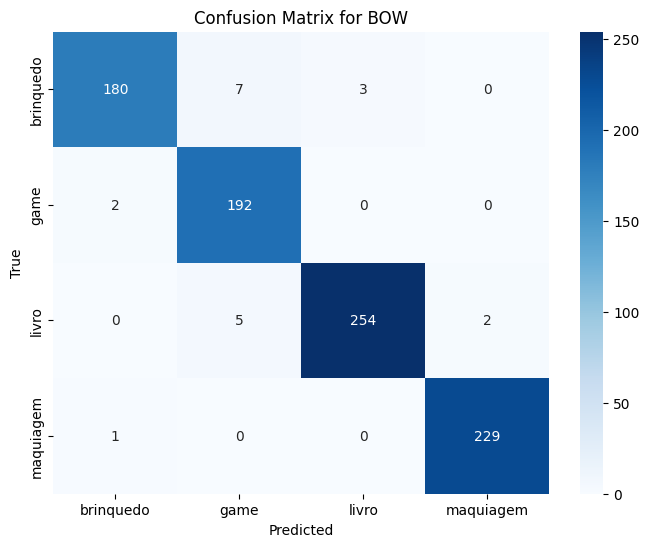

Resultados para BOW:
              precision    recall  f1-score   support

   brinquedo       0.98      0.95      0.97       190
        game       0.94      0.99      0.96       194
       livro       0.99      0.97      0.98       261
   maquiagem       0.99      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875

Matriz de Confusão para BOW:
[[180   7   3   0]
 [  2 192   0   0]
 [  0   5 254   2]
 [  1   0   0 229]]


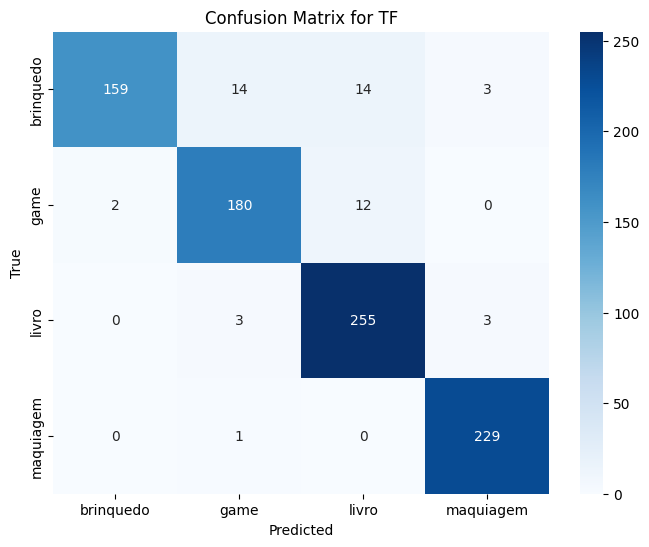

Resultados para TF:
              precision    recall  f1-score   support

   brinquedo       0.99      0.84      0.91       190
        game       0.91      0.93      0.92       194
       livro       0.91      0.98      0.94       261
   maquiagem       0.97      1.00      0.98       230

    accuracy                           0.94       875
   macro avg       0.94      0.93      0.94       875
weighted avg       0.94      0.94      0.94       875

Matriz de Confusão para TF:
[[159  14  14   3]
 [  2 180  12   0]
 [  0   3 255   3]
 [  0   1   0 229]]


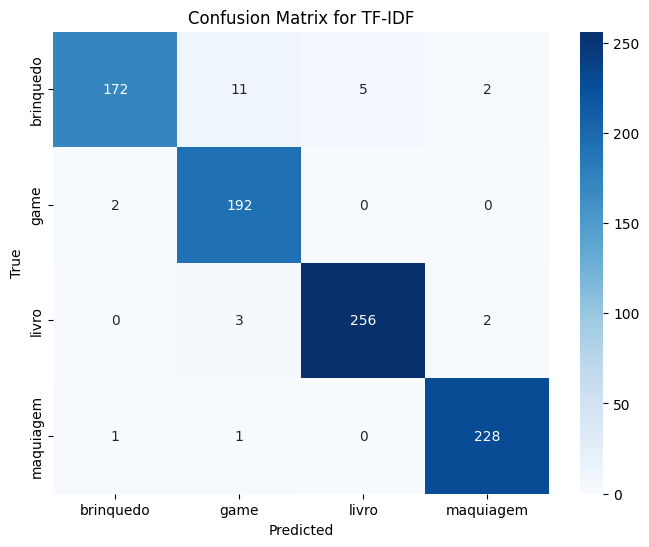

Resultados para TF-IDF:
              precision    recall  f1-score   support

   brinquedo       0.98      0.91      0.94       190
        game       0.93      0.99      0.96       194
       livro       0.98      0.98      0.98       261
   maquiagem       0.98      0.99      0.99       230

    accuracy                           0.97       875
   macro avg       0.97      0.97      0.97       875
weighted avg       0.97      0.97      0.97       875

Matriz de Confusão para TF-IDF:
[[172  11   5   2]
 [  2 192   0   0]
 [  0   3 256   2]
 [  1   1   0 228]]


In [ ]:
y_pred_bow = clf_bow.predict(X_test_bow)
y_pred_tf = clf_tf.predict(X_test_tf)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", xticklabels=clf_bow.classes_, yticklabels=clf_bow.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BOW')
plt.show()

print("Resultados para BOW:")
print(classification_report(y_test, y_pred_bow))
print("Matriz de Confusão para BOW:")
print(confusion_matrix(y_test, y_pred_bow))


cm_tf = confusion_matrix(y_test, y_pred_tf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tf, annot=True, fmt="d", cmap="Blues", xticklabels=clf_tf.classes_, yticklabels=clf_tf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TF')
plt.show()

print("Resultados para TF:")
print(classification_report(y_test, y_pred_tf))
print("Matriz de Confusão para TF:")
print(confusion_matrix(y_test, y_pred_tf))


cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Blues", xticklabels=clf_tfidf.classes_, yticklabels=clf_tfidf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

print("Resultados para TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))
print("Matriz de Confusão para TF-IDF:")
print(confusion_matrix(y_test, y_pred_tfidf))

### **Conclusão - PARTE 01**

Na "Parte 1", foram aplicadas três técnicas de vetorização de texto (BOW, TF e TF-IDF) com um mínimo de normalização, incluindo tokenização, remoção de pontuação e conversão para letras minúsculas.

Foram treinados modelos de classificação usando o algoritmo Multinomial Naive Bayes para cada técnica de vetorização.

As técnicas de vetorização (BOW, TF e TF-IDF) são úteis para a representação de texto em problemas de classificação.

Cada técnica teve um desempenho razoável na classificação de produtos, com algumas diferenças nas métricas de avaliação.

A técnica TF-IDF apresentou um desempenho ligeiramente melhor em termos de precisão, recall e F1-score em comparação com BOW e TF.

A escolha da técnica de vetorização pode depender do contexto e dos requisitos específicos do problema.

A **Parte 1** serviu como uma base para compreender como diferentes técnicas de vetorização afetam o desempenho do modelo de classificação.

## **Parte 2 - Diferentes tipos de vetorização com um processo completo de normalização**

### **Bibliotecas**

In [ ]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

Com objetivo de importar varias bibliotecas com modulos de dados.

### **Download de Recursos Linguísticos**

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

O objetivo desses comandos é garantir que obtenha acesso aos recursos linguisticos da biblioteca NLTK (Natural Language Toolkit) para realizar tarefas de processamento de linguagem natural, como lematização, stemming e remoção de stopwords.

### **Carregador de Dados**

In [ ]:
url = 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv'
data = pd.read_csv(url, delimiter=';')
print(data)

                                                   nome  \
0                               O Hobbit - 7ª Ed. 2013    
1                    Livro - It A Coisa - Stephen King    
2      Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...   
3                                     Box Harry Potter    
4                             Livro Origem - Dan Brown    
...                                                 ...   
4075   Zelda: Breath Of The Wild - Expansion Pass - ...   
4076   Middle Earth Shadow Of Mordor Legion Edition ...   
4077   Fifa 17 Ps3 Dublado Em Pt Br Envio Digital Im...   
4078   Gta San Andreas Hd Remastered Ps3 Envio Imedi...   
4079   Mini Game  Nova Portátil 10mil Jogos Player M...   

                                              descricao categoria  
0     Produto NovoBilbo Bolseiro é um hobbit que lev...     livro  
1     Produto NovoDurante as férias escolares de 195...     livro  
2     Produto NovoTodo o reino de Westeros ao alcanc...     livro  
3     Produto Novo 

Possui o objetivo de carregar os dados do arquivo CSV da url: "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", usando a biblioteca Pandas.

### **Remoção de registros com valores faltantes**

In [ ]:
data = data.dropna()

Possui o objetivo de remover linhas (registros) do DataFrame data que contenham valores faltantes (NaN, Not a Number) em qualquer uma das colunas.

### **Concatenando as colunas "nome" e "descrição"**

In [ ]:
data['texto'] = data['nome'] + ' ' + data['descricao']
print(data['texto'])

0        O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bol...
1        Livro - It A Coisa - Stephen King  Produto No...
2        Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3        Box Harry Potter  Produto Novo e Físico  A sé...
4        Livro Origem - Dan Brown  Produto NovoDe Onde...
                              ...                        
4073     Red Dead Redemption Edição Do Ano Goty Xbox 3...
4074     Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...
4075     Zelda: Breath Of The Wild - Expansion Pass - ...
4078     Gta San Andreas Hd Remastered Ps3 Envio Imedi...
4079     Mini Game  Nova Portátil 10mil Jogos Player M...
Name: texto, Length: 2916, dtype: object


Com o objetivo de criar uma nova coluna no DataFrame data chamada 'texto'.

### **Separando dados de treinamento e teste (30% para teste)**

In [ ]:
X = data['texto']
y = data['categoria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Preparação dos dados para treinamento e teste de um modelo de classificação de texto.

### **Função de pré-processamento**

In [ ]:
def preprocess_text(text):
    # Tokenização
    tokens = text.split()
    # Remoção de pontuação
    tokens = [word for word in tokens if word not in string.punctuation]
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Remoção de stop-words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

    X_train = X_train.apply(preprocess)
    X_test = X_test.apply(preprocess)


Possui o objetivo de criar uma função que realiza uma série de etapas de pré-processamento de texto em um documento de texto

### **Aplicando o pré-processamento aos dados**

In [ ]:
data['preprocessed_text'] = data['texto'].apply(preprocess_text)

Aplicar a função de pré-processamento de texto preprocess_text a uma coluna chamada 'texto' em um DataFrame data e armazenar os resultados na nova coluna 'preprocessed_text'.

### **Criando os vetores BOW, TF e TF-IDF**

In [ ]:
bow_vectorizer = CountVectorizer()
tf_vectorizer = TfidfVectorizer(use_idf=False)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Prepararação do texto para treinamento e teste em modelos de classificação de texto, aplicando três técnicas diferentes de vetorização - BOW, TF e TF-IDF.

### **Treinando modelos**

In [ ]:
clf_bow = MultinomialNB()
clf_tf = MultinomialNB()
clf_tfidf = MultinomialNB()

clf_bow.fit(X_train_bow, y_train)
clf_tf.fit(X_train_tf, y_train)
clf_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

Possui o objetivo de treinar três modelos de classificação de texto usando o algoritmo Multinomial Naive Bayes com base em diferentes representações de texto (BOW, TF e TF-IDF) para posteriormente avaliar o desempenho de cada modelo.

### **Função para plotar matrizes de confusão**

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

Definir uma função chamada plot_confusion_matrix que gera e exibe uma matriz de confusão como um gráfico de calor (heatmap) para avaliar o desempenho de um modelo de classificação.

### **Definição dos rótulos diretamente com base nos dados de teste**

In [ ]:
labels = y_test.unique()

 Extrair os rótulos únicos das classes do conjunto de dados de teste (y_test) para serem usados na visualização e interpretação da matriz de confusão.

### **Avaliando os modelos - BOW, TF e TF-IDF**

Resultados para BOW (completa normalização):
              precision    recall  f1-score   support

   brinquedo       0.98      0.95      0.97       190
        game       0.94      0.99      0.96       194
       livro       0.99      0.97      0.98       261
   maquiagem       0.99      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875

Matriz de Confusão para BOW:
[[180   7   3   0]
 [  2 192   0   0]
 [  0   5 254   2]
 [  1   0   0 229]]


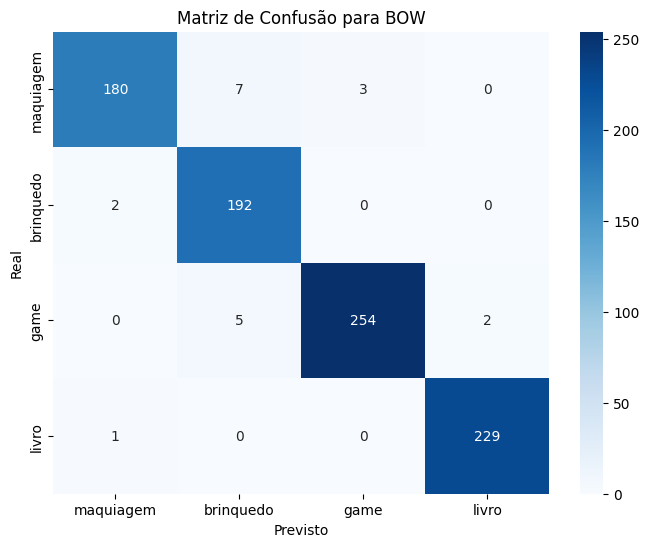

Resultados para TF (completa normalização):
              precision    recall  f1-score   support

   brinquedo       0.99      0.84      0.91       190
        game       0.91      0.93      0.92       194
       livro       0.91      0.98      0.94       261
   maquiagem       0.97      1.00      0.98       230

    accuracy                           0.94       875
   macro avg       0.94      0.93      0.94       875
weighted avg       0.94      0.94      0.94       875

Matriz de Confusão para TF:
[[159  14  14   3]
 [  2 180  12   0]
 [  0   3 255   3]
 [  0   1   0 229]]


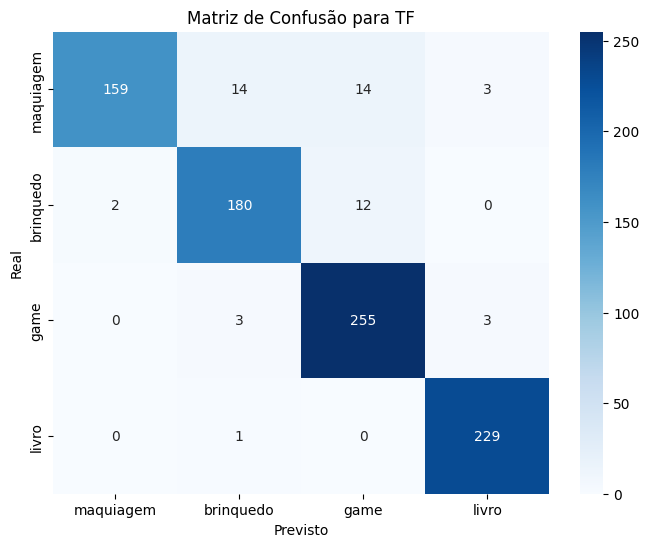

Resultados para TF-IDF (completa normalização):
              precision    recall  f1-score   support

   brinquedo       0.98      0.93      0.96       190
        game       0.95      0.99      0.97       194
       livro       0.98      0.98      0.98       261
   maquiagem       0.98      1.00      0.99       230

    accuracy                           0.97       875
   macro avg       0.97      0.97      0.97       875
weighted avg       0.98      0.97      0.97       875

Matriz de Confusão para TF-IDF:
[[177   8   4   1]
 [  2 192   0   0]
 [  0   3 255   3]
 [  1   0   0 229]]


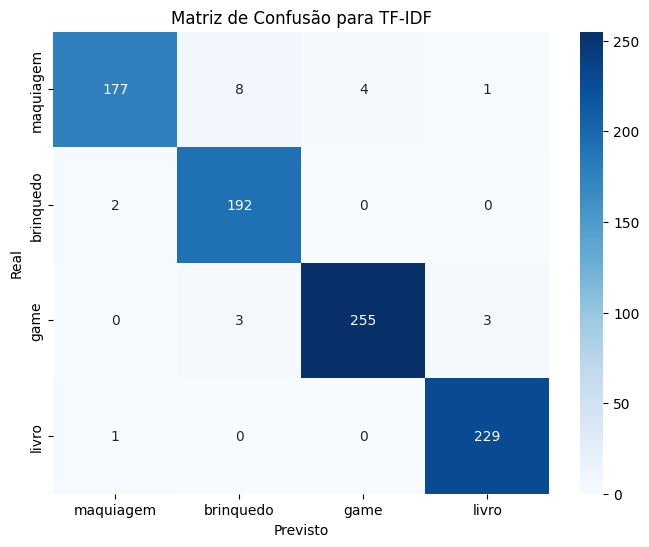

In [ ]:
y_pred_bow = clf_bow.predict(X_test_bow)
y_pred_tf = clf_tf.predict(X_test_tf)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

#Modelo BOW
print("Resultados para BOW (completa normalização):")
print(classification_report(y_test, y_pred_bow))
print("Matriz de Confusão para BOW:")
print(confusion_matrix(y_test, y_pred_bow))
plot_confusion_matrix(y_test, y_pred_bow, labels, "Matriz de Confusão para BOW")

#Modelo TF
print("Resultados para TF (completa normalização):")
print(classification_report(y_test, y_pred_tf))
print("Matriz de Confusão para TF:")
print(confusion_matrix(y_test, y_pred_tf))
plot_confusion_matrix(y_test, y_pred_tf, labels, "Matriz de Confusão para TF")

#Modelo TF-IDF
print("Resultados para TF-IDF (completa normalização):")
print(classification_report(y_test, y_pred_tfidf))
print("Matriz de Confusão para TF-IDF:")
print(confusion_matrix(y_test, y_pred_tfidf))
plot_confusion_matrix(y_test, y_pred_tfidf, labels, "Matriz de Confusão para TF-IDF")

### **Conclusão - PARTE 02**

Nesta parte 02, foi aplicada uma normalização mais completa nos textos, incluindo tokenização, remoção de pontuação, conversão para letras minúsculas, remoção de stop-words e lematização.

Os textos pré-processados foram então submetidos a três técnicas de vetorização de texto (BOW, TF e TF-IDF).

Modelos de classificação baseados em Multinomial Naive Bayes foram treinados para cada configuração de vetorização e normalização.

Relatórios de classificação foram gerados, incluindo métricas como precisão, recall e F1-score para cada categoria de produtos.

Matrizes de confusão foram plotadas para visualizar o desempenho da classificação.

Então **Parte 02**, demonstrou a importância da normalização de texto e como diferentes técnicas de vetorização e normalização podem impactar o desempenho do modelo na tarefa de classificação de produtos.

## **Parte 3 (Extra) - Diferentes algorítmos de classificação**

### **Bibliotecas**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Com objetivo de importar varias bibliotecas com modulos de dados.

### **Carregador de Dados**

In [ ]:
url = 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv'
data = pd.read_csv(url, delimiter=';')
print(data)

                                                   nome  \
0                               O Hobbit - 7ª Ed. 2013    
1                    Livro - It A Coisa - Stephen King    
2      Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...   
3                                     Box Harry Potter    
4                             Livro Origem - Dan Brown    
...                                                 ...   
4075   Zelda: Breath Of The Wild - Expansion Pass - ...   
4076   Middle Earth Shadow Of Mordor Legion Edition ...   
4077   Fifa 17 Ps3 Dublado Em Pt Br Envio Digital Im...   
4078   Gta San Andreas Hd Remastered Ps3 Envio Imedi...   
4079   Mini Game  Nova Portátil 10mil Jogos Player M...   

                                              descricao categoria  
0     Produto NovoBilbo Bolseiro é um hobbit que lev...     livro  
1     Produto NovoDurante as férias escolares de 195...     livro  
2     Produto NovoTodo o reino de Westeros ao alcanc...     livro  
3     Produto Novo 

Possui o objetivo de carregar os dados do arquivo CSV da url: "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", usando a biblioteca Pandas.

### **Remoção de registros com valores faltantes**

In [ ]:
data = data.dropna()

Possui o objetivo de remover linhas (registros) do DataFrame data que contenham valores faltantes (NaN, Not a Number) em qualquer uma das colunas.

### **Concatenando as colunas "nome" e "descrição"**

In [ ]:
data['texto'] = data['nome'] + ' ' + data['descricao']
print(data['texto'])

0        O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bol...
1        Livro - It A Coisa - Stephen King  Produto No...
2        Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3        Box Harry Potter  Produto Novo e Físico  A sé...
4        Livro Origem - Dan Brown  Produto NovoDe Onde...
                              ...                        
4073     Red Dead Redemption Edição Do Ano Goty Xbox 3...
4074     Jogo Gta 5 Grand Theft Auto V Ps4 Mídia Cd + ...
4075     Zelda: Breath Of The Wild - Expansion Pass - ...
4078     Gta San Andreas Hd Remastered Ps3 Envio Imedi...
4079     Mini Game  Nova Portátil 10mil Jogos Player M...
Name: texto, Length: 2916, dtype: object


Com o objetivo de criar uma nova coluna no DataFrame data chamada 'texto'.

### **Tokenização, remoção de pontuação, lowercasing**

In [ ]:
data['texto'] = data['texto'].str.lower().str.replace('[^\w\s]', '', regex=True)

Preparação do texto na coluna "texto" para análise, tornando-o consistente em termos de maiúsculas/minúsculas e removendo caracteres indesejados.

### **Remoção de stop-words**

In [ ]:
stop_words = set(stopwords.words("portuguese"))
data['texto'] = data['texto'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

Possui o objetivo de remover palavras comuns que não contêm muita informação e, geralmente, não são úteis para a análise de texto.

### **Lematização**

In [ ]:
lemmatizer = WordNetLemmatizer()
data['texto'] = data['texto'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

Com o objetivo de realizar a lematização nas palavras do texto na coluna "texto" do DataFrame "data". Assim é útil para garantir que palavras diferentes com a mesma raiz sejam tratadas de forma semelhante, reduzindo a dimensionalidade do texto e tornando a análise mais eficiente.

### **Dividos os dados em treinamento e teste (30% para teste)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['texto'], data['categoria'], test_size=0.3, random_state=42)

Possui a função de dividir os dados em conjuntos de treinamento e teste, separando o texto (características) e as categorias (rótulos) para o treinamento e teste de modelos de classificação.

### **Vetorização - TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Realizar a vetorização do texto (representação numérica) usando o método TF-IDF nos conjuntos de treinamento e teste.

### **Modelo 1: Regressão Logística**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression()

Criação do modelo de classificação e Regressão Logística treinado para classificar texto com base nas representações TF-IDF das palavras.

### **Modelo 2: Random Forest**


In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression()

Criação do modelo de classificação com base no algoritmo Random Forest, treinado para classificar texto com base nas representações TF-IDF das palavras.

### **Modelo 3: Naive Bayes**

In [ ]:
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

 Criação do modelo de classificação usando o algoritmo Naive Bayes Multinomial, treinado para classificar texto com base nas representações TF-IDF das palavras.

### **Avalie os modelos - Regressão Logistica, Radom Forest e Naive Bayes**



In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

y_pred_rf = model_rf.predict(X_test_tfidf)
y_pred_lr = model_lr.predict(X_test_tfidf)
y_pred_nb = model_nb.predict(X_test_tfidf)


print("Relatório de Classificação (Regressão Logística):")
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusão (Regressão Logística):")
print(confusion_matrix(y_test, y_pred_lr))

print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusão (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("Relatório de Classificação (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))
print("Matriz de Confusão (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))

Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

   brinquedo       0.96      0.98      0.97       190
        game       0.98      0.97      0.98       194
       livro       0.99      0.99      0.99       261
   maquiagem       1.00      1.00      1.00       230

    accuracy                           0.99       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.99      0.99      0.99       875

Matriz de Confusão (Regressão Logística):
[[187   2   1   0]
 [  5 188   1   0]
 [  1   1 258   1]
 [  1   0   0 229]]
Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

   brinquedo       0.97      0.98      0.98       190
        game       0.99      0.97      0.98       194
       livro       0.99      0.98      0.98       261
   maquiagem       0.98      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98   

O objetivo deste comando é avaliar e comparar o desempenho dos modelos de classificação em relação aos dados de teste.

### **Modelos de Classificação**

In [ ]:
models = {
    "Regressão Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Rede Neural (MLP)": MLPClassifier()
}

results = {}  # Armazenar as métricas de avaliação

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": classification_rep["weighted avg"]["precision"],
        "Recall": classification_rep["weighted avg"]["recall"],
        "F1-Score": classification_rep["weighted avg"]["f1-score"]
    }


 Com a função de realizar uma avaliação comparativa dos diferentes modelos de classificação e armazenar as métricas de desempenho para cada modelo em um formato que permita uma análise e seleção eficaz do melhor modelo para a tarefa de classificação de texto.

### **DataFrame com os resultados**

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score
Regressão Logística  0.985143   0.985245  0.985143  0.985157
Random Forest        0.984000   0.984008  0.984000  0.983974
Naive Bayes          0.974857   0.975248  0.974857  0.974775
Árvore de Decisão    0.952000   0.954731  0.952000  0.952689
Rede Neural (MLP)    0.992000   0.992063  0.992000  0.991999


Criação de um DataFrame do pandas a partir do dicionário results contendo as métricas de avaliação dos modelos de classificação e, em seguida, imprimir esse DataFrame.

### **Gráfico de barras para visualizar a precisão dos modelos**

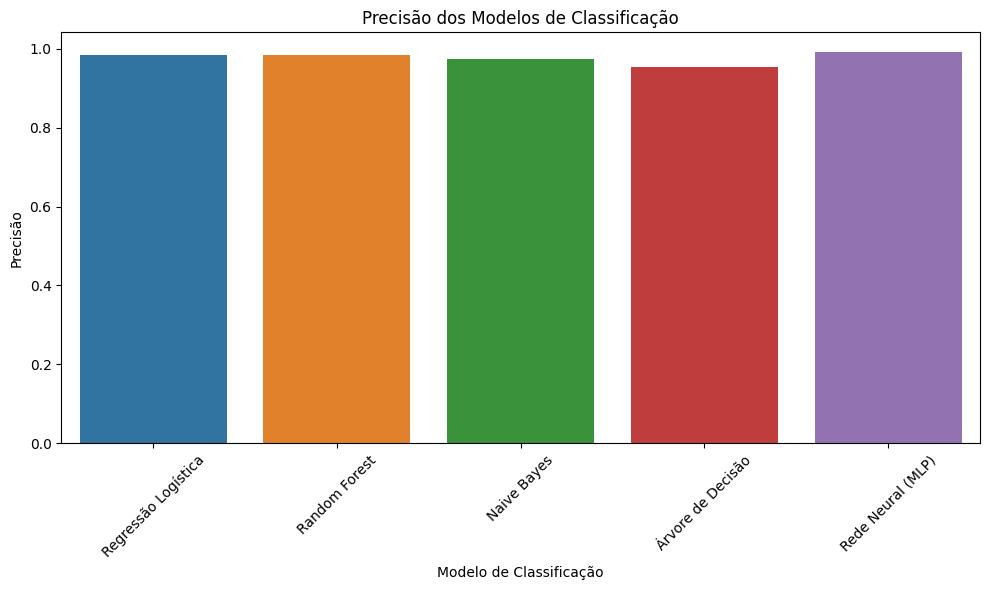

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Precision'])
plt.xlabel('Modelo de Classificação')
plt.ylabel('Precisão')
plt.title('Precisão dos Modelos de Classificação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclusão - PARTE 03**

Dados de produtos foram carregados a partir de um arquivo CSV, pré-processados e combinados em uma única coluna "texto".

O pré-processamento incluiu a conversão para letras minúsculas, remoção de caracteres não alfanuméricos, eliminação de stopwords em português e lematização das palavras.

Os dados foram divididos em conjuntos de treinamento e teste.

Modelos de classificação, incluindo Regressão Logística, Random Forest e Naive Bayes (MultinomialNB), foram treinados usando a representação TF-IDF dos textos.
Previsões foram geradas para cada modelo.

Os resultados foram avaliados com base em métricas de classificação, incluindo precisão, recall, F1-score e acurácia.

A precisão média ponderada foi usada como métrica principal de avaliação de desempenho.

Um gráfico de barras foi criado para visualizar a precisão de cada modelo.

A **Parte 03** explorou o processo completo de classificação de texto, incluindo pré-processamento, treinamento de modelos e avaliação de desempenho. Os modelos foram comparados com base na precisão média ponderada, ajudando na seleção do modelo mais adequado para a tarefa de classificação de produtos com base em textos descritivos. A escolha do modelo depende dos requisitos específicos da aplicação e das métricas desejadas.